<a href="https://colab.research.google.com/github/luizgontijo/notebooks_classes/blob/master/intro_recommendation_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to recommendation systems using python

In this notebook we will understand the principles of recommendation systems. For this, we will use the Movie Lens movie [dataset](https://grouplens.org/datasets/movielens/latest/). We will start with the initial recommendation concepts and evolve to obtain an algorithm based on KNN (K-nearest neighbors).





# Chapter 01 - Import data and make a baseline algorithm



Import some necessary libraries.


In [1]:
import pandas as pd
import numpy as np

Then import the data. For this I downloaded the dataset from this [site](https://grouplens.org/datasets/movielens/latest/) and uploaded on my google drive account.

First we need the dataset used to describe the title and the gender of the movie.


In [2]:
movies = pd.read_csv('/content/drive/MyDrive/Alura/ml_sist_rec_python/ml-latest-small/movies.csv')

In [3]:
movies.columns = ["movieId", "title", "gender"]
movies = movies.set_index("movieId") # use the movieId as the index of the table
movies.head()

,title,gender
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


Second we need the dataset to show the rate ogiven by user.

In [4]:
rate = pd.read_csv("/content/drive/MyDrive/Alura/ml_sist_rec_python/ml-latest-small/ratings.csv")

rate.columns = ["userId", "movieId", "rate", "moment"]

rate.head()

,userId,movieId,rate,moment
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


We can see some statistics about this last dataset.

In [5]:
rate.describe()

,userId,movieId,rate,moment
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## Create a baseline model to give some movies recommendations

The recommendation I used here is the number of votes a film receives. If a movie has a lot of votes, it is possible that this movie is a good recommendation.


Count the number of times a movie has been watched.


In [6]:
total_votes = rate["movieId"].value_counts()
total_votes.head()

356     329
318     317
296     307
593     279
2571    278
Name: movieId, dtype: int64

In [7]:
# create a column to indicate the number of times a movie has been watched
movies["total_votes"] = total_votes
movies.head()

,title,gender,total_votes
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


Sort by the movie with more total_votes.

In [8]:
movies.sort_values("total_votes", ascending=False).head()

,title,gender,total_votes
movieId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


If we want to recommend a movie to one person that we don't know, or do not has any information, this is a good alternative.

# Chapter 02 - Improve the baseline method

Here I just used the baseline method but with some alternative to create a better recommendation. Now instead of using the amount of votes, I start using the average rate of the movies. 


In [9]:
# calculate the average rate of the movies
avg_rates = rate.groupby("movieId").mean()["rate"]

In [10]:
# create a column to indicate the avg rates
movies["avg_rates"] = avg_rates

In [11]:
# sort movies by the avg rates
movies.sort_values("avg_rates", ascending=False).head(10)

,title,gender,total_votes,avg_rates
movieId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


For this method we can see a problem. Some movies has just one vote but average rate of 5 (the maximun). This cannot be accepted as it would deliver a wrong recommendation. To correct this, a filter must be applied to the selected films so that we only have films with a certain number of votes.




In [12]:
# using movies with 50 or more votes
movies.query("total_votes >= 50").sort_values("avg_rates", ascending=False).head(10)

,title,gender,total_votes,avg_rates
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


# Chapter 03 - Some other improvements to the previous model

Suppose I watched some of the movies listed on the previous model. Now I have some information about the person to recommend the movie.

In [13]:
# list of movies I has watched

I_watched = [1, 21, 19, 10, 11, 7, 2]

movies.loc[I_watched]

,title,gender,total_votes,avg_rates
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


I can use the genders of I movie I whatched to recommend other movies.

In [14]:
# filter by the gender and sort by the avg_rates
movies.query("gender=='Comedy|Drama|Romance'").sort_values("avg_rates", ascending=False).head(10)

,title,gender,total_votes,avg_rates
movieId,,,,
3567,Bossa Nova (2000),Comedy|Drama|Romance,1.0,5.0
83969,Down Argentine Way (1940),Comedy|Drama|Romance,1.0,5.0
26928,"Summer's Tale, A (Conte d'été) (1996)",Comedy|Drama|Romance,1.0,5.0
67618,Strictly Sexual (2008),Comedy|Drama|Romance,1.0,5.0
33649,Saving Face (2004),Comedy|Drama|Romance,1.0,5.0
26147,"Thousand Clowns, A (1965)",Comedy|Drama|Romance,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
158882,All Yours (2016),Comedy|Drama|Romance,1.0,5.0
3531,All the Vermeers in New York (1990),Comedy|Drama|Romance,1.0,5.0


In [15]:
# Now create a list of movies with more than 50 numbers of votes and sort by the avg rate
movies_more_than_50 = movies.query("total_votes >= 50").sort_values("avg_rates", ascending=False)

Now I can take off the movies I have watched.

In [16]:
crime_drama =  movies_more_than_50.query("gender=='Crime|Drama'")
crime_drama.drop(I_watched, errors="ignore").sort_values("avg_rates", ascending=False).head(10)

,title,gender,total_votes,avg_rates
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000
2329,American History X (1998),Crime|Drama,129.0,4.217054
3147,"Green Mile, The (1999)",Crime|Drama,111.0,4.148649
16,Casino (1995),Crime|Drama,82.0,3.926829
5989,Catch Me If You Can (2002),Crime|Drama,115.0,3.921739
55820,No Country for Old Men (2007),Crime|Drama,64.0,3.898438


# Chapter 05 - Using the rates as distances between different users 

Given the rates some users has given to any movie, we can place these notes as points on a plane.



For example, supose the rates of 3 people for the movie toy story and jumanji are:

* John - 4 for toy story and 4.5 for jumanji - [4, 4.5]
* Maria - 5 for toy story and 5 for jumanji - [5, 5]

We can calculate the distance between Paul and Maria using the Pythagorean Theorem:

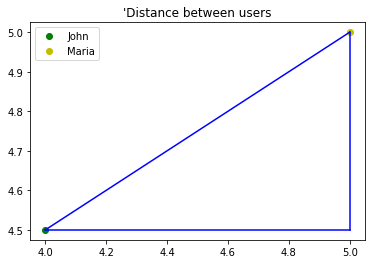

In [17]:
import matplotlib.pyplot as plt

plt.plot(4,4.5, "go")
plt.plot(5,5,"yo")
plt.legend(['John', 'Maria'])
plt.title("'Distance between users")

plt.plot([4,5], [4.5,4.5], color = 'b', linestyle='-')
plt.plot([4,5], [4.5,5], color = 'b', linestyle='-')
plt.plot([5,5], [4.5,5], color = 'b',linestyle='-')

Represent the rates of those two as arrays using numpy.


In [18]:
john = np.array([4,4.5])
maria = np.array([5,5])

Now use the Pythagorean Theorem to calculate the distance.

In [19]:
from math import sqrt
def pythagorean(a, b):
  delta_x, delta_y = a - b
  return sqrt(delta_x*delta_x + delta_y*delta_y)

In [20]:
pythagorean(john,maria)

1.118033988749895

There is also a numpy function that calculates this distance.

In [21]:
np.linalg.norm(john-maria)

1.118033988749895

Creating a better Pythagorean function

In [22]:
def pythagorean(a,b):
  return np.linalg.norm(a-b)

In [23]:
pythagorean(john,maria)

1.118033988749895

Rename the function to 'distance'.

In [24]:
def distance(a,b):
  return np.linalg.norm(a-b)

# Chapter 06 - Apply the distance concept for every user in the dataset

First I created a function to take the rates of each user.


In [25]:
def rate_user(user):
  rate_user = rate.query('userId == %d' % user)
  rate_user = rate_user[['movieId', 'rate']].set_index('movieId')
  return rate_user

In [26]:
# show the rates that the user 1 gave to each movie
user1 = rate_user(1)
user1.head()

,rate
movieId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


Create a function to calculate the distance between two arrays.

In [27]:
def distance_arrays(a,b):
  return np.linalg.norm(a-b)

Create a function to show the distance between each user.

In [28]:
def distance_users(userId1, userId2):
  rates1 = rate_user(userId1)
  rates2 = rate_user(userId2)

  difference = rates1.join(rates2, lsuffix = '_left', rsuffix = '_rigth').dropna()

  return distance_arrays(difference['rate_left'], difference['rate_rigth'])

In [29]:
# distance between users 1 and 4
distance_users(1,4)

11.135528725660043

# Chapter 06 - Calculate the distance between one user and every other in the dataset

Now apply the function to every possible combination of two users.

FIrs count the number of users.

In [33]:
count_users = len(rate['userId'].unique())

print('We have %d users' % count_users)

We have 610 users


Every user will have 609 counts of distance between each other.

Change the last function to show the users the distance is calculated.

In [38]:
def distance_users(userId1, userId2):
  rates1 = rate_user(userId1)
  rates2 = rate_user(userId2)

  difference = rates1.join(rates2, lsuffix = '_left', rsuffix = '_rigth').dropna()

  distance = distance_arrays(difference['rate_left'], difference['rate_rigth'])

  return [userId1, userId2, distance]

In [39]:
distance_users(1,4)

[1, 4, 11.135528725660043]

Create a function to iterate over every user and get the distances.

In [43]:
def distance_all(youId):
  distance = []
  for userId in rate['userId'].unique():
    information = distance_users(youId, userId)
    distance.append(information)
  return distance

In [45]:
youId = 1
distance_all(youId)[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

We can change the last function.

In [50]:
def distance_all(youId):
  all_users = rate['userId'].unique()
  distances = [distance_users(youId, userId) for userId in all_users]
  distances = pd.DataFrame(distances, columns = ['you', 'other_person', 'distance']) # create a pandas DataFrame
  return distances

In [52]:
distance_all(1).head()

,you,other_person,distance
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


# Chapter 07 - Fix the last function

In the function distance_all created, we can have some users with no rates given to a movie compared to the youId chosed. For that cases, the results of the function are wrong. In this chapter I fix that issue. 

One way to fix that problem is to put a huge distance between users withou equal movies.

In [56]:
def distance_users(userId1, userId2, min = 5):
  rates1 = rate_user(userId1)
  rates2 = rate_user(userId2)

  difference = rates1.join(rates2, lsuffix = '_left', rsuffix = '_rigth').dropna()

  if (len(difference) < min):
    return [userId1, userId2, 10000]

  distance = distance_arrays(difference['rate_left'], difference['rate_rigth'])

  return [userId1, userId2, distance]

In [57]:
def distance_all(youId):
  all_users = rate['userId'].unique()
  distances = [distance_users(youId, userId) for userId in all_users]
  distances = pd.DataFrame(distances, columns = ['you', 'other_person', 'distance'])
  return distances

In [58]:
distance_all(1).head()

,you,other_person,distance
0,1,1,0.000000
1,1,2,10000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


Note that the distance between users 1 and 2 are equal to 10000. This two don't have any movie in comum.

Now create a function to show users with less distance from each other.

In [59]:
def more_close(youId):
  distance = distance_all(youId)
  distance = distance.sort_values('distance')
  return distance

In [60]:
more_close(1).head()

,you,other_person,distance
0,1,1,0.000000
76,1,77,0.000000
510,1,511,0.500000
365,1,366,0.707107
522,1,523,1.000000


Improve the last function to take off the user compared with the others.

In [61]:
def more_close(youId):
  distance = distance_all(youId)
  distance = distance.sort_values('distance')
  distance = distance.set_index('other_person').drop(youId)
  return distance

In [64]:
more_close(1)

,you,distance
other_person,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000
...,...,...
190,1,10000.000000
60,1,10000.000000
576,1,10000.000000


# Chapter 08 - Create a way to test the system

First chose the quantity of users to compare the distance.

In [85]:
def more_close(youId, user_analyse = None):
  distance = distance_all(youId, user_analyse)
  distance = distance.sort_values('distance')
  distance = distance.set_index('other_person').drop(youId)
  return distance

In [86]:
def distance_all(youId, user_analyse = None):
  all_users = rate['userId'].unique()
  if user_analyse:
    all_users = all_users[:user_analyse]
  distance = [distance_users(youId, userId) for userId in all_users]
  distance = pd.DataFrame(distance, columns = ['you', 'other_person', 'distance'])
  return distance

In [87]:
more_close(1, user_analyse = 50)
# passa somente pelos 50 primeiros usuários

,you,distance
other_person,,
49,1,1.000000
9,1,1.000000
13,1,1.414214
25,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


Improve the last function by taking off the 10000 values of users without matching movies.


In [94]:
def distance_users(userId1, userId2, min = 5):
  rates1 = rate_user(userId1)
  rates2 = rate_user(userId2)

  difference = rates1.join(rates2, lsuffix = '_left', rsuffix = '_rigth').dropna()

  if (len(difference) < min):
    return None

  distance = distance_arrays(difference['rate_left'], difference['rate_rigth'])

  return [userId1, userId2, distance]

In [95]:
def distance_all(youId, user_analyse = None):
  all_users = rate['userId'].unique()

  if user_analyse:
    all_users = all_users[:user_analyse]

  distances = [distance_users(youId, usuario_id) for usuario_id in all_users]
  distances = list(filter(None, distances)) #arranca fora todos esses usuários com None na distancia
  distances = pd.DataFrame(distances, columns = ['you', 'other_person', 'distance'])
  return distances

In [96]:
more_close(1, user_analyse = 50)

,you,distance
other_person,,
49,1,1.000000
9,1,1.000000
25,1,1.414214
13,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


The last result indicates the 50 users with more similar notes.


In [99]:
# now if you are the user number 1 and wants to see the rates of the user more close to you:
you = 1
similar = more_close(1, user_analyse = 50)
similar = similar.iloc[0].name # encontra o usuário mais similar

rates_similar = rate_user(similar)

rates_similar.head()

,rate
movieId,
110,4.0
318,4.0
356,4.0
527,4.5
1097,4.5


Now create a function to recommend movies to one user based on the rates the more close user has given to other movies.

In [111]:
def recommend_for(user, user_analyse = None):
  rate_you = rate_user(user)
  movies_user_saw = rate_you.index

  similar = more_close(user, user_analyse)
  similar = similar.iloc[0].name
  rate_similar = rate_user(similar)
  rate_similar = rate_similar.drop(movies_user_saw, errors = 'ignore')
  recommendations = rate_similar.sort_values('rate', ascending=False)
  return recommendations.join(movies)

In [112]:
recommend_for(user=1, user_analyse=50).head()

,rate,title,gender,total_votes,avg_rates
movieId,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,126.0,3.964286
4022,4.5,Cast Away (2000),Drama,100.0,3.700000
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,46.0,3.793478
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151


# Chapter 09 - Improve the last function considering more than one user to compare the distances

First change the function to show the more closed users.

In [115]:
def more_close(youId, user_analyse = None, n_more_close=10):
  distance = distance_all(youId, user_analyse)
  distance = distance.sort_values('distance')
  distance = distance.set_index('other_person').drop(youId)
  return distance.head(n_more_close)

In [117]:
more_close(youId = 1, user_analyse = 50, n_more_close = 10)

,you,distance
other_person,,
49,1,1.000000
9,1,1.000000
25,1,1.414214
13,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


Now change the function recommend_for to count with others users.

In [120]:
def recommend_for(user, user_analyse = None, n_more_close=10):
  rate_you = rate_user(user)
  movies_user_saw = rate_you.index
  
  similar = more_close(user, user_analyse=user_analyse, n_more_close=n_more_close)
  similar_users = similar.index

  rates_similar = rate.set_index('userId').loc[similar_users]
  recommendations = rates_similar.groupby('movieId').mean()[['rate']] # use the mean of the distances do recommend
  recommendations = recommendations.sort_values('rate', ascending=False)
  
  return recommendations.join(movies).head()

In [122]:
recommend_for(1, user_analyse=50, n_more_close=50).head()

,rate,title,gender,total_votes,avg_rates
movieId,,,,,
3502,5.0,My Life (1993),Drama,3.0,3.500000
4102,5.0,Eddie Murphy Raw (1987),Comedy|Documentary,6.0,3.500000
6618,5.0,Shaolin Soccer (Siu lam juk kau) (2001),Action|Comedy,17.0,3.823529
538,5.0,Six Degrees of Separation (1993),Drama,12.0,3.583333
6345,5.0,"Chorus Line, A (1985)",Comedy|Drama|Musical,3.0,4.666667


In [123]:
recommend_for(1, user_analyse=50, n_more_close=10).head()

,rate,title,gender,total_votes,avg_rates
movieId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,12.0,3.875000
68157,5.0,Inglourious Basterds (2009),Action|Drama|War,88.0,4.136364
475,5.0,In the Name of the Father (1993),Drama,25.0,4.300000
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
7153,5.0,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919


The function more_close and recommend_for are the basis for the knn algorithm (k-nearest neighbors). The first function shows the closest neighbors (users with the most similar notes) and the second function indicates the films based on these users' notes.

So, now I change the name of the functions to be in accordance with the algorithm.


In [135]:
def knn(userId, user_analyse = None, k_more_close=10):
  distance = distance_all(userId, user_analyse)
  distance = distance.sort_values('distance')
  distance = distance.set_index('other_person').drop(userId)
  return distance.head(k_more_close)

In [136]:
def recommend_for(userId, user_analyse = None, k_more_close=10):
  rates_you = rate_user(userId)
  movies_you_saw = rates_you.index
  
  similar = knn(userId, k_more_close = k_more_close, user_analyse = user_analyse)
  similar_users = similar.index

  rates_similar = rate.set_index('userId').loc[similar_users]
  recommendations = rates_similar.groupby('movieId').mean()[['rate']]
  recommendations = recommendations.sort_values('rate', ascending=False)
  return recommendations.join(movies).head()

In [128]:
# just to check de results
recommend_for(1, user_analyse=50, k_more_close=50).head()

,rate,title,gender,total_votes,avg_rates
movieId,,,,,
3502,5.0,My Life (1993),Drama,3.0,3.500000
4102,5.0,Eddie Murphy Raw (1987),Comedy|Documentary,6.0,3.500000
6618,5.0,Shaolin Soccer (Siu lam juk kau) (2001),Action|Comedy,17.0,3.823529
538,5.0,Six Degrees of Separation (1993),Drama,12.0,3.583333
6345,5.0,"Chorus Line, A (1985)",Comedy|Drama|Musical,3.0,4.666667


# Chapter 10 - Use the functions created to give recommendations to a new user

Now I have the functions to give recommentadions given a user and the raes of the movie, I can create a fictional user and test the functions.



First create a array with movieId and the rate.

In [129]:
[
[600, 2],
[1246, 5],
[2529, 2],
[2329, 5],
[2324, 5],
[1, 2],
[7, 0.5],
[2, 2],
[1196, 1],
[260, 1]
]

[[600, 2],
 [1246, 5],
 [2529, 2],
 [2329, 5],
 [2324, 5],
 [1, 2],
 [7, 0.5],
 [2, 2],
 [1196, 1],
 [260, 1]]

In [130]:
# jsut to see the movies of the fictional user
movies.loc[[600, 1246, 2529, 2329, 2324, 1, 7, 2, 1196, 260]]

,title,gender,total_votes,avg_rates
movieId,,,,
600,Love and a .45 (1994),Action|Comedy|Crime,1.0,4.000000
1246,Dead Poets Society (1989),Drama,86.0,3.959302
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi,56.0,3.803571
2329,American History X (1998),Crime|Drama,129.0,4.217054
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War,88.0,4.147727
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640


Create a function to add the new user to the dataset.

In [131]:
def new_user(data):
  new_user = rate['userId'].max()+1

  new_user_rates = pd.DataFrame(data, columns = ['movieId', 'rate'])
  new_user_rates['userId'] = new_user
  return pd.concat([rate, new_user_rates])


In [132]:
# add the new user to the dataframe of rates
# note the old dataframe will be changed
rate = new_user([[600, 2], [1246, 5], [2529, 2], [2329, 5], [2324, 5], [1, 2], [7, 0.5], [2, 2], [1196, 1], [260, 1]])
rate.tail()

,userId,movieId,rate,moment
5,611,1,2.0,NaN
6,611,7,0.5,NaN
7,611,2,2.0,NaN
8,611,1196,1.0,NaN
9,611,260,1.0,NaN


Test the recommendetion system with the new user.

In [141]:
recommend_for(611).head()

,rate,title,gender,total_votes,avg_rates
movieId,,,,,
77846,5.0,12 Angry Men (1997),Crime|Drama,1.0,5.000000
84273,5.0,Zeitgeist: Moving Forward (2011),Documentary,1.0,5.000000
898,5.0,"Philadelphia Story, The (1940)",Comedy|Drama|Romance,29.0,4.310345
89864,5.0,50/50 (2011),Comedy|Drama,19.0,3.631579
1245,5.0,Miller's Crossing (1990),Crime|Drama|Film-Noir|Thriller,20.0,4.225000


Now use the last functions just with the movies with more than 50 rates.

In [147]:
rate = rate.set_index('movieId').loc[movies_more_than_50.index]
rate.head()

,userId,rate,moment
movieId,,,
318,2,3.0,1.445715e+09
318,5,3.0,8.474349e+08
318,6,5.0,8.455532e+08
318,8,5.0,8.394635e+08
318,11,4.0,9.021551e+08


In [148]:
rate = rate.reset_index()
rate.head() # volta a ter a coluna filmeId

,movieId,userId,rate,moment
0,318,2,3.0,1.445715e+09
1,318,5,3.0,8.474349e+08
2,318,6,5.0,8.455532e+08
3,318,8,5.0,8.394635e+08
4,318,11,4.0,9.021551e+08


In [149]:
recommend_for(611).head()

,rate,title,gender,total_votes,avg_rates
movieId,,,,,
112852,5.000000,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59.0,4.050847
74458,4.666667,Shutter Island (2010),Drama|Mystery|Thriller,67.0,4.022388
8874,4.600000,Shaun of the Dead (2004),Comedy|Horror,77.0,4.006494
1090,4.500000,Platoon (1986),Drama|War,63.0,3.984127
78499,4.500000,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,55.0,4.109091


# Chapter 11 - Use other way to consider the influence of the neighbors in the recommentadions

In the first proposal to implement the recommendation system, the average distance between the closest neighbors was used to recommend the movies. Now we can use the total votes for each movie.

In [150]:
def knn(userId, user_analyse=None, k_more_close=10):
  distance = distance_all(userId, user_analyse = user_analyse)
  distance = distance.sort_values('distance')
  distance = distance.set_index('other_person').drop(userId, errors = 'ignore')
  return distance.head(k_more_close)

In [153]:
def recommend_for(userId, user_analyse=None, k_more_close=10):
  rates_you = rate_user(userId)
  filmes_user_saw = rates_you.index
  
  similar = knn(userId, user_analyse = user_analyse, k_more_close = k_more_close)
  similar_users = similar.index

  rates_similar = rate.set_index('userId').loc[similar_users]
  recommendations = rates_similar.groupby('movieId').mean()[['rate']]
  appearances = rates_similar.groupby('movieId').count()[['rate']]

  min_filter = k_more_close / 2 # set a filter

  recommendations =  recommendations.join(appearances, lsuffix='_mean_users', rsuffix='_appearances_users')
  recommendations = recommendations.query('rate_appearances_users >= %.2f' % min_filter)
  recommendations = recommendations.sort_values('rate_mean_users', ascending=False)
  recommendations = recommendations.drop(filmes_user_saw, errors='ignore')
  return recommendations.join(movies)
  # desconsiderar filmes com poucos votos entre as 10 pessoas consideradas

  #recomendacoes = recomendacoes.sort_values('nota', ascending=False)
  #return recomendacoes.join(filmes).head()

In [157]:
recommend_for(611).head(10)

,rate_mean_users,rate_appearances_users,title,gender,total_votes,avg_rates
movieId,,,,,,
8874,4.600000,5,Shaun of the Dead (2004),Comedy|Horror,77.0,4.006494
318,4.437500,8,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
4973,4.357143,7,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,120.0,4.183333
7361,4.333333,9,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131.0,4.160305
904,4.300000,5,Rear Window (1954),Mystery|Thriller,84.0,4.261905
79132,4.250000,6,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
593,4.222222,9,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
3949,4.214286,7,Requiem for a Dream (2000),Drama,96.0,3.921875
46578,4.214286,7,Little Miss Sunshine (2006),Adventure|Comedy|Drama,77.0,3.883117


In [159]:
recommend_for(611, k_more_close = 20).head(10)

,rate_mean_users,rate_appearances_users,title,gender,total_votes,avg_rates
movieId,,,,,,
593,4.300000,15,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
4973,4.269231,13,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,120.0,4.183333
296,4.205882,17,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
1213,4.200000,10,Goodfellas (1990),Crime|Drama,126.0,4.250000
318,4.176471,17,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
4878,4.125000,12,Donnie Darko (2001),Drama|Mystery|Sci-Fi|Thriller,109.0,3.981651
7361,4.125000,16,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi,131.0,4.160305
58559,4.100000,10,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
5618,4.100000,10,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy,87.0,4.155172


# Chapter 12 - Conclusions



As we can see in this notebbok, there are several alternatives for creating recommendation systems. One of the most famous uses distance from nearby elements, such as the KNN. However, there are several consolidated alternatives in Python, such as LigthFM that present good results.

I hope I helped to consolidate knowledge about recommendation systems!